## 1-1 CCTV 현황과 인구 현황 데이터 구하기

* 서울시 자치구 CCTV 설치 현황
    * http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2722&srvType=S&serviceKind=1
* 서울시 서울통계 서울인구
    * https://data.seoul.go.kr/dataList/datasetView.do?infId=419&srvType=S&serviceKind=2&currentPageNo=1&searchValue=&searchKey=null

- 2016년 데이터 사용

## 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
pop_Seoul = pd.read_excel('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/population_in_Seoul.xls', encoding = 'utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2016,합계,4189839,10204057,5007379,5196678,9930616,4876789,5053827,273441,130590,142851,2.37,1300877
3,2016,종로구,72118,161922,79322,82600,152737,75201,77536,9185,4121,5064,2.12,25091
4,2016,중구,59651,134409,66452,67957,125249,62204,63045,9160,4248,4912,2.1,20606


- 원본 엑셀 파일에서 첫 3줄이 열의 제목으로 되어 있기 때문에 위와 같이 읽어들이게 된다.

In [7]:
pop_Seoul = pd.read_excel('C:/Users/jeong/Documents/JUPYTER NOTEBOOK/population_in_Seoul.xls', 
                         header = 2,    # 2번째 줄을 열 이름으로 하고 3번째 줄부터 읽는다.
                         usecols = 'B,D,G,J,N',    # 해당 열만 가져오도록 한다 (old-version : parse_cols)
                         encoding = 'utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10204057,9930616,273441,1300877
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262


In [8]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                           pop_Seoul.columns[1] : '인구수',
                           pop_Seoul.columns[2] : '한국인',
                           pop_Seoul.columns[3] : '외국인',
                           pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10204057,9930616,273441,1300877
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262


## 1-3 pandas 기초 익히기

In [9]:
import pandas as pd
import numpy as np

In [10]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [11]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = ['A','B','C','D'])
df

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473
2013-01-06,0.497616,-0.084596,1.434871,-0.185312


- 6행 4열의 random변수를 만들고 *index*에 행이름을 지정하고 *columns*에 열이름을 지정한다.

In [13]:
df.head(3)

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 2.4294261 ,  2.12157148, -2.54295015, -1.00736159],
       [ 0.5193462 , -0.1569162 , -0.74289565, -0.73321859],
       [ 0.0571153 ,  1.08959244, -0.09753331, -1.37227928],
       [-1.35802092,  1.184754  , -0.72554148, -0.3978545 ],
       [ 1.4365214 , -0.21440458, -0.25543791, -0.45947254],
       [ 0.4976164 , -0.08459645,  1.43487118, -0.18531197]])

In [17]:
df.info()    # DataFrame의 개요 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [18]:
df.describe()    # 통계적 개요 확인

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.597001,0.656667,-0.488248,-0.692583
std,1.280006,0.957330,1.284383,0.438464
min,-1.358021,-0.214405,-2.542950,-1.372279
25%,0.167241,-0.138836,-0.738557,-0.938826
50%,0.508481,0.502498,-0.490490,-0.596346
75%,1.207228,1.160964,-0.137009,-0.413259
max,2.429426,2.121571,1.434871,-0.185312


In [19]:
df.sort_values(by='B', ascending=False)    # B열을 기준으로 정렬

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-06,0.497616,-0.084596,1.434871,-0.185312
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473


In [20]:
df

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473
2013-01-06,0.497616,-0.084596,1.434871,-0.185312


In [21]:
df['A']

2013-01-01    2.429426
2013-01-02    0.519346
2013-01-03    0.057115
2013-01-04   -1.358021
2013-01-05    1.436521
2013-01-06    0.497616
Freq: D, Name: A, dtype: float64

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854


In [24]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [25]:
df.loc[dates[0]]    # loc는 location 옵션으로 슬라이싱할 때 loc 옵션을 이용해서 위치값을 지정할 수 있다.

A    2.429426
B    2.121571
C   -2.542950
D   -1.007362
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,2.429426,2.121571
2013-01-02,0.519346,-0.156916
2013-01-03,0.057115,1.089592
2013-01-04,-1.358021,1.184754
2013-01-05,1.436521,-0.214405
2013-01-06,0.497616,-0.084596


In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.519346,-0.156916
2013-01-03,0.057115,1.089592
2013-01-04,-1.358021,1.184754


In [28]:
df.loc['20130102',['A','B']]

A    0.519346
B   -0.156916
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
df.loc[dates[0],'A']

2.4294261035300897

In [30]:
df.iloc[3]    # df.iloc[,3]와 동일

A   -1.358021
B    1.184754
C   -0.725541
D   -0.397854
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.358021,1.184754
2013-01-05,1.436521,-0.214405


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.519346,-0.742896
2013-01-03,0.057115,-0.097533
2013-01-05,1.436521,-0.255438


In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279


In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,2.121571,-2.542950
2013-01-02,-0.156916,-0.742896
2013-01-03,1.089592,-0.097533
2013-01-04,1.184754,-0.725541
2013-01-05,-0.214405,-0.255438
2013-01-06,-0.084596,1.434871


In [35]:
df

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473
2013-01-06,0.497616,-0.084596,1.434871,-0.185312


In [36]:
df[df.A>0]

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473
2013-01-06,0.497616,-0.084596,1.434871,-0.185312


In [37]:
df[df['A']>0]

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473
2013-01-06,0.497616,-0.084596,1.434871,-0.185312


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,2.429426,2.121571,NaN,NaN
2013-01-02,0.519346,NaN,NaN,NaN
2013-01-03,0.057115,1.089592,NaN,NaN
2013-01-04,NaN,1.184754,NaN,NaN
2013-01-05,1.436521,NaN,NaN,NaN
2013-01-06,0.497616,NaN,1.434871,NaN


In [39]:
df2=df.copy()
df2

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473
2013-01-06,0.497616,-0.084596,1.434871,-0.185312


- 그냥 = 기호를 이용해서 복사하면 내용이 복사되는 것이 아니라 데이터의 위치만 복사되는 것이므로 원본 데이터 하나만 있게 된다.
> 데이터의 내용까지 복사하려면 copy() 옵션을 붙여 넣어야 한다.

In [40]:
df2['E'] = ['one','one','two','three','four','three']    # 칼럼 E 추가
df2

,A,B,C,D,E
2013-01-01,2.429426,2.121571,-2.542950,-1.007362,one
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219,one
2013-01-03,0.057115,1.089592,-0.097533,-1.372279,two
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854,three
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473,four
2013-01-06,0.497616,-0.084596,1.434871,-0.185312,three


In [41]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [42]:
df2[df2['E'].isin(['two','four'])]    # E 칼럼에서 two와 four이 있는 행만 출력

,A,B,C,D,E
2013-01-03,0.057115,1.089592,-0.097533,-1.372279,two
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473,four


In [43]:
df

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,0.519346,-0.156916,-0.742896,-0.733219
2013-01-03,0.057115,1.089592,-0.097533,-1.372279
2013-01-04,-1.358021,1.184754,-0.725541,-0.397854
2013-01-05,1.436521,-0.214405,-0.255438,-0.459473
2013-01-06,0.497616,-0.084596,1.434871,-0.185312


In [44]:
df.apply(np.cumsum)    # 누적합 cumsum

,A,B,C,D
2013-01-01,2.429426,2.121571,-2.542950,-1.007362
2013-01-02,2.948772,1.964655,-3.285846,-1.740580
2013-01-03,3.005888,3.054248,-3.383379,-3.112859
2013-01-04,1.647867,4.239002,-4.108921,-3.510714
2013-01-05,3.084388,4.024597,-4.364358,-3.970186
2013-01-06,3.582004,3.940001,-2.929487,-4.155498


In [45]:
df.apply(lambda x: x.max()-x.min())

A    3.787447
B    2.335976
C    3.977821
D    1.186967
dtype: float64

## 1-4 pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

In [46]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- 구별 CCTV 전체 갯수인 *소계*로 정렬

In [47]:
CCTV_Seoul.sort_values(by='소계',ascending=True).head()    # 오름차순 정렬

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [48]:
CCTV_Seoul.sort_values(by='소계',ascending=False).head()    # 내림차순 정렬

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [49]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] +CCTV_Seoul['2016년']) \
                            / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [50]:
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [51]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10204057,9930616,273441,1300877
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262


In [52]:
pop_Seoul.drop([0],inplace=True)    # axis=0 (default:row) axis=1 (column)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262
5,광진구,372104,357215,14889,41441


In [53]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [54]:
pop_Seoul[pop_Seoul['구별'].isnull()]    # Nan이 있는 경우 어디에 있는지 확인하기 위함.

,구별,인구수,한국인,외국인,고령자


In [55]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161922,152737,9185,25091,5.672484,15.495733
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083
4,성동구,307161,299259,7902,39262,2.572592,12.782222
5,광진구,372104,357215,14889,41441,4.001301,11.136940


In [56]:
pop_Seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664946,657831,7115,71064,1.070012,10.687184
16,강서구,602104,595485,6619,71062,1.099312,11.802280
23,강남구,572140,567115,5025,61931,0.878282,10.824449
11,노원구,571212,567581,3631,70887,0.635666,12.409928
21,관악구,525607,506851,18756,66952,3.568446,12.738034


In [57]:
pop_Seoul.sort_values(by='외국인',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,406779,370613,36166,51844,8.890823,12.745004
17,구로구,449600,417551,32049,55705,7.128336,12.389902
18,금천구,254654,235386,19268,32279,7.566345,12.675630
21,관악구,525607,506851,18756,66952,3.568446,12.738034
6,동대문구,370312,355069,15243,53460,4.116259,14.436475


In [58]:
pop_Seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,406779,370613,36166,51844,8.890823,12.745004
18,금천구,254654,235386,19268,32279,7.566345,12.675630
17,구로구,449600,417551,32049,55705,7.128336,12.389902
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083


In [59]:
pop_Seoul.sort_values(by='고령자',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
12,은평구,495937,491476,4461,71457,0.899509,14.408483
24,송파구,664946,657831,7115,71064,1.070012,10.687184
16,강서구,602104,595485,6619,71062,1.099312,11.802280
11,노원구,571212,567581,3631,70887,0.635666,12.409928
21,관악구,525607,506851,18756,66952,3.568446,12.738034


In [60]:
pop_Seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330704,327195,3509,54053,1.061070,16.344828
1,종로구,161922,152737,9185,25091,5.672484,15.495733
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083
13,서대문구,325871,314194,11677,47653,3.583320,14.623271


## 1-5 pandas 고급 기능 - 두 DataFrame 병합하기

In [61]:
df1 = pd.DataFrame({'A' : ['A0','A1','A2','A3'],
                   'B' : ['B0','B1','B2','B3'],
                   'C' : ['C0','C1','C2','C3'],
                   'D' : ['D0','D1','D2','D3']})
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [62]:
df2 = pd.DataFrame({'A' : ['A4','A5','A6','A7'],
                   'B' : ['B4','B5','B6','B7'],
                   'C' : ['C4','C5','C6','C7'],
                   'D' : ['D4','D5','D6','D7']},
                  index=[4,5,6,7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [63]:
df3 = pd.DataFrame({'A' : ['A8','A9','A10','A11'],
                   'B' : ['B8','B9','B10','B11'],
                   'C' : ['C8','C9','C10','C11'],
                   'D' : ['D8','D9','D10','D11']},
                  index=[8,9,10,11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [64]:
# 열 방향으로 단순히 합치기
result = pd.concat([df1,df2,df3])    # axis=0(defult;row)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [65]:
# key지정된 구분은 다중 index가 되어서 level형성
result = pd.concat([df1,df2,df3],keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [66]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [67]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [68]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [69]:
df4 = pd.DataFrame({'B' : ['B2','B3','B6','B7'],
                   'D' : ['D2','D3','D6','D7'],
                   'F' : ['F2','F3','F6','F7']},
                  index=[2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [70]:
result = pd.concat([df1,df4],axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [71]:
result = pd.concat([df1,df4], axis=1, join='inner')    # 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [72]:
result = pd.concat([df1,df4], axis=1, join_axes=[df1.index])    # join_axes옵션으로 df1의 인덱스에 맞추도록 함
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [73]:
# ignore_index옵션을 사용하면 두 데이터의 index를 무시하고 합친 후 다시 index를 부여한다.
result = pd.concat([df1,df4], ignore_index=True, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [74]:
left = pd.DataFrame({'A' : ['A0','A1','A2','A3'],
                    'B' : ['B0','B1','B2','B3'],
                    'key' :['K0','K4','K2','K3']})
right = pd.DataFrame({'C' : ['C0','C1','C2','C3'],
                     'D' : ['D0','D1','D2','D3'],
                     'key' : ['K0','K1','K2','K3']})

In [75]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K4
2,A2,B2,K2
3,A3,B3,K3


In [76]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [77]:
pd.merge(left,right,on='key')    # 공통된 key에 대해서만 합치게 한다.

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


In [78]:
pd.merge(left,right,how='left',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [79]:
pd.merge(left,right,how='right',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3
3,NaN,NaN,K1,C1,D1


In [80]:
pd.merge(left,right,how='outer',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K4,NaN,NaN
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3
4,NaN,NaN,K1,C1,D1


In [81]:
pd.merge(left,right,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A2,B2,K2,C2,D2
2,A3,B3,K3,C3,D3


## 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [82]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161922,152737,9185,25091,5.672484,15.495733
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083


In [83]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252


In [84]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul,on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,572140,567115,5025,61931,0.878282,10.824449
1,강동구,1010,379,99,155,377,166.490765,448471,444168,4303,53195,0.959482,11.861414
2,강북구,831,369,120,138,204,125.203252,330704,327195,3509,54053,1.061070,16.344828
3,강서구,911,388,258,184,81,134.793814,602104,595485,6619,71062,1.099312,11.802280
4,관악구,2109,846,260,390,613,149.290780,525607,506851,18756,66952,3.568446,12.738034


- 행 방향으로 삭제 : drop
- 열 방향으로 삭제 : del

In [85]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449
1,강동구,1010,166.490765,448471,444168,4303,53195,0.959482,11.861414
2,강북구,831,125.203252,330704,327195,3509,54053,1.061070,16.344828
3,강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280
4,관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034


In [86]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449
강동구,1010,166.490765,448471,444168,4303,53195,0.959482,11.861414
강북구,831,125.203252,330704,327195,3509,54053,1.061070,16.344828
강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280
관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034


In [87]:
# 상관관계 np.corrcoef
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.26057098],
       [-0.26057098,  1.        ]])

In [88]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.05261233],
       [-0.05261233,  1.        ]])

In [89]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.24806123],
       [0.24806123, 1.        ]])

   - CCTV개수와 고령자비율은 음의 상관관계
   - CCTV개수와 외국인비율은 거의 상관이 없음
   - CCTV개수와 인구수는 약한 양의 상관관계

In [90]:
data_result.sort_values(by='소계',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449
양천구,2482,34.671731,481845,477739,4106,52063,0.852141,10.804927
서초구,2297,63.371266,451477,447192,4285,50984,0.949107,11.292713
관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034
은평구,2108,85.237258,495937,491476,4461,71457,0.899509,14.408483


In [91]:
data_result.sort_values(by='인구수',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,664946,657831,7115,71064,1.070012,10.687184
강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280
강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449
노원구,1566,188.929889,571212,567581,3631,70887,0.635666,12.409928
관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034


## 1-7 파이썬의 대표 시각화 도구 - Matplotlib

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline    
# 그래프의 결과를 출력 세션에 나타나게 하는 설정

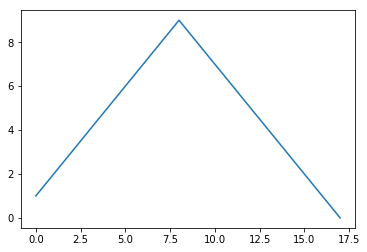

In [93]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [94]:
import numpy as np
t = np.arange(0,12,0.01)
y = np.sin(t)

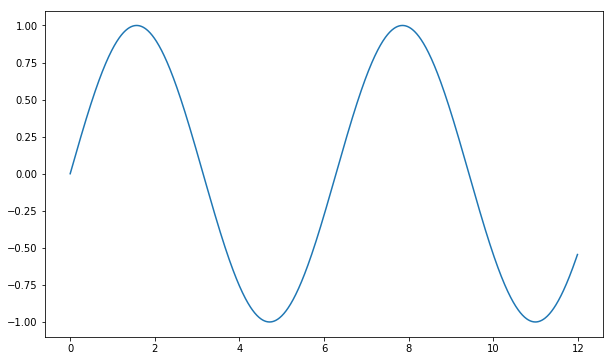

In [95]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

- plt.grid() : 격자무늬
- plt.xlabel : x축 라벨
- plt.ylabel : y축 라벨
- plt.title : 제목지정

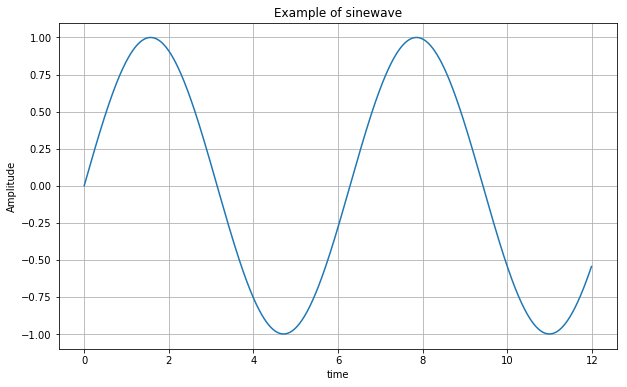

In [96]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

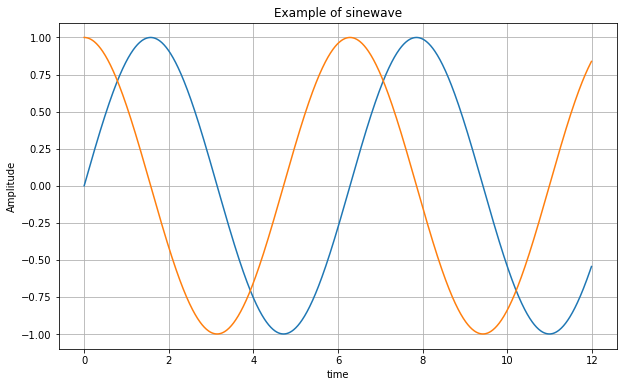

In [97]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

- plot의 옵션에 label= 옵션을 추가
- plt.legend() : legend 추가

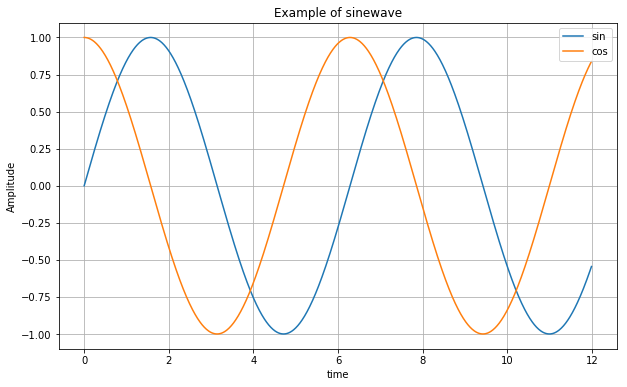

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),label='sin')
plt.plot(t,np.cos(t),label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

- plot의 옵션에 lw= 옵션을 추가하여 선의 굵기 지정
- plot의 옵션에 color= 옵션을 추가하여 선의 색깔 지정

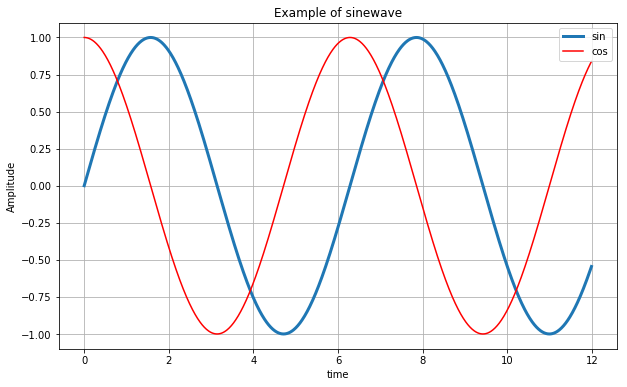

In [99]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),lw=3,label='sin')
plt.plot(t,np.cos(t),color='r',label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

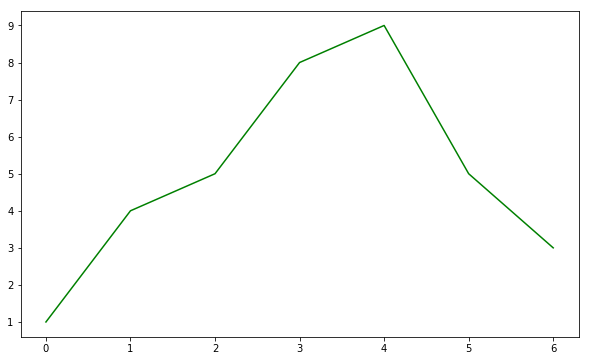

In [100]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green')
plt.show()

- plot에서 옵션으로 linestyle= 를 추가하여 선의 스타일을 지정

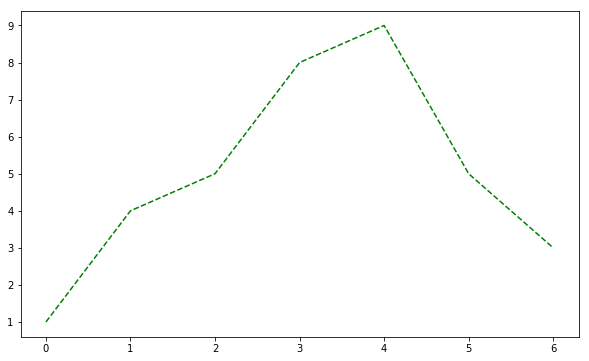

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green',linestyle='dashed')
plt.show()

- plot에서 옵션으로 marker= 를 추가하여 데이터가 존재하는 곳에 마킹

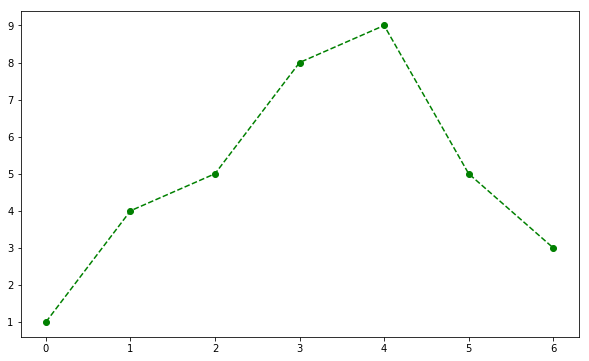

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green',marker='o',linestyle='dashed')
plt.show()

- markerfacecolor= : 마커의 색상 지정
- markersize= : 마커의 크기 지정
- xlim : x축의 범위 지정
- ylim : y축의 범위 지정

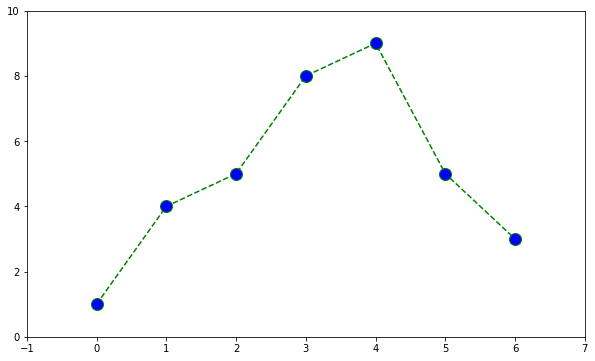

In [103]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green',linestyle='dashed',
        marker='o',markerfacecolor='blue',markersize=12)
plt.xlim([-1,7])
plt.ylim([0,10])
plt.show()

- plot대신에 scatter를 사용하여 산점도를 그릴 수 있다.

In [104]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

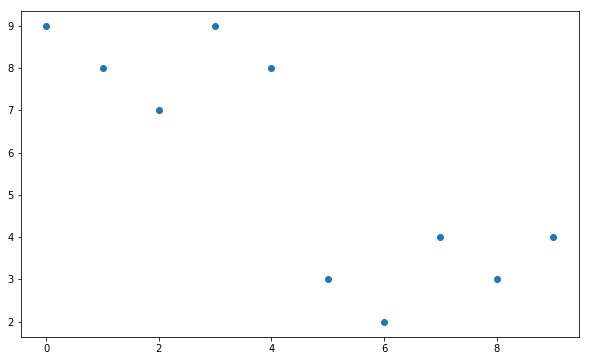

In [105]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

- scatter에 옵션으로 marker= 를 지정하여 모양 지정

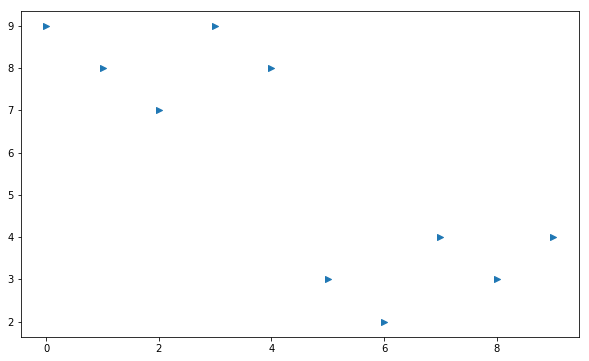

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(t,y,marker='>')
plt.show()

- s : 마커의 크기 지정
- c : 마커의 색상 지정
    - colormap을 이용하여 t에 따라 색상이 바뀌게 설정
- plt.colorbar() : colorbar가 plot 옆에 나타나도록 지정

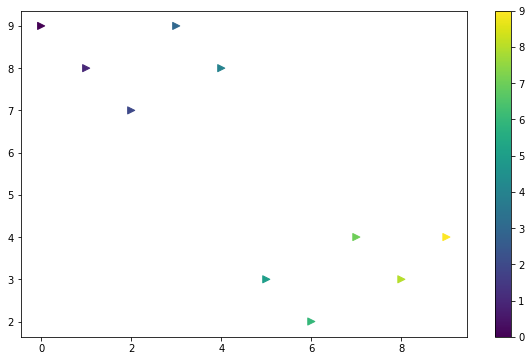

In [107]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y,s=50,c=colormap,marker='>')
plt.colorbar()
plt.show()

In [108]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)
# loc : 평균 / scale : 표준편차

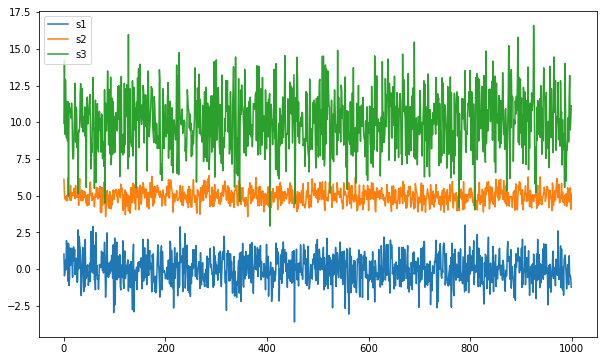

In [109]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

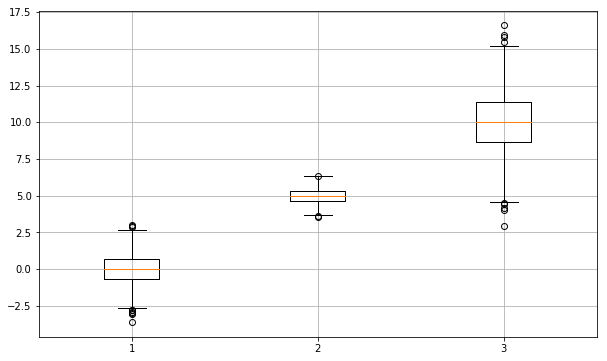

In [110]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

## 1-8 CCTV 현황 그래프로 분석하기

In [111]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'C:/WIndows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry')

In [112]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449
강동구,1010,166.490765,448471,444168,4303,53195,0.959482,11.861414
강북구,831,125.203252,330704,327195,3509,54053,1.061070,16.344828
강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280
관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034


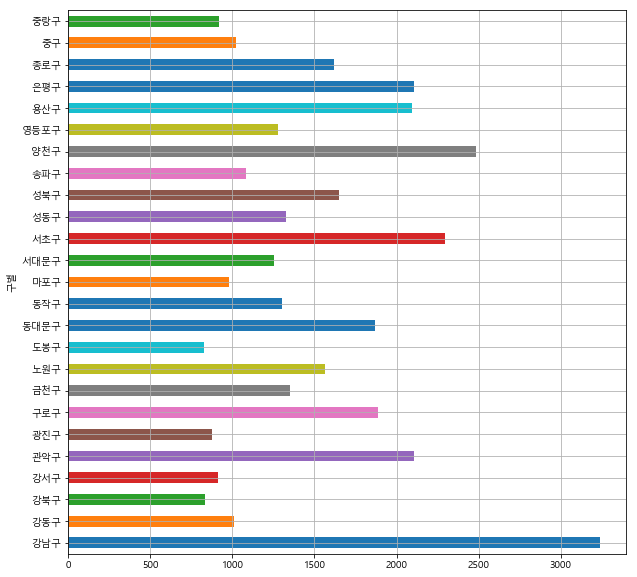

In [113]:
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))    # barh : 수평막대그래프
plt.show()

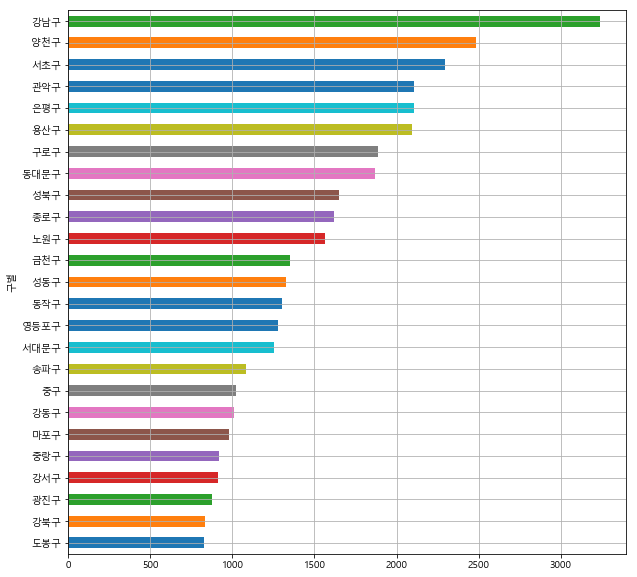

In [114]:
data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

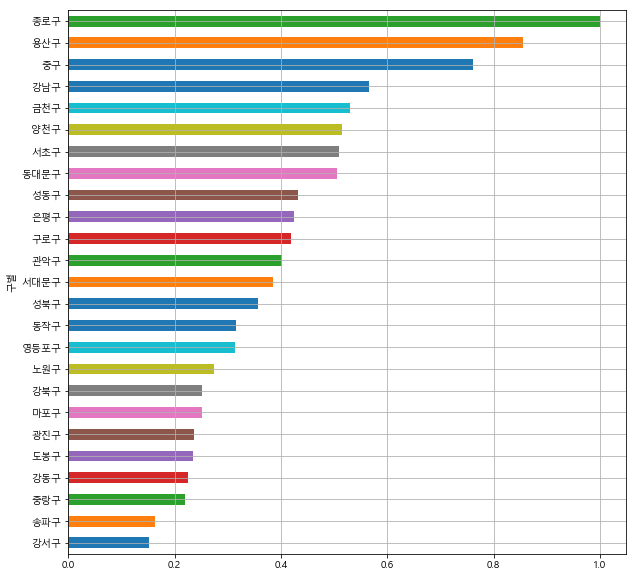

In [115]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', figsize=(10,10), grid=True)
plt.show()

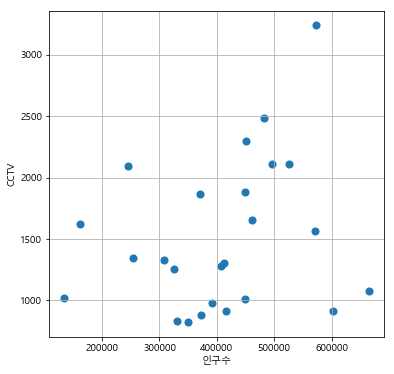

In [116]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [117]:
# 회귀적합
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], deg = 1)    # least squares polynomial fit / deg : 자유도
fp1

array([1.17459847e-03, 1.03589321e+03])

In [118]:
f1 = np.poly1d(fp1)    # f1에 계수 저장
fx = np.linspace(100000, 700000, 100)    # 100000-700000까지 100개의 숫자

In [119]:
f1[0], f1[1]

(1035.893210964291, 0.0011745984686181892)

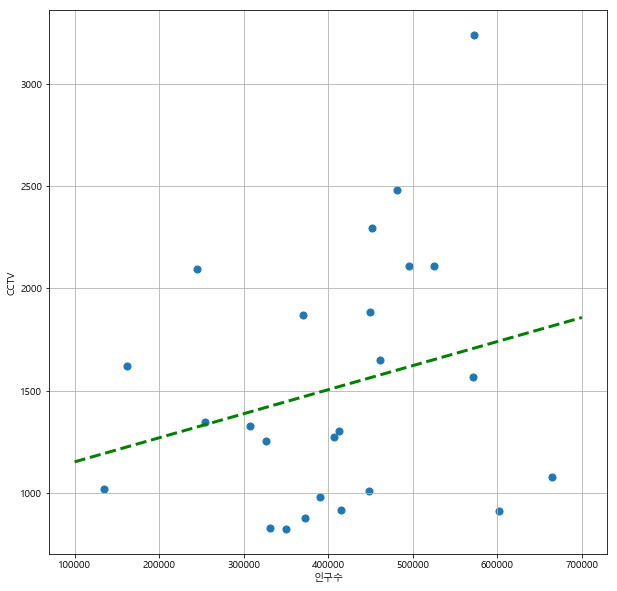

In [120]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), linestyle='dashed', color='green', lw=3)
plt.grid()
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

- 목표!!
    - 직선에서 멀리 떨어져 있는 구가 어디인지 나타내고자 함
    - 직선에서 멀어질수록 다른 색을 나타내고자 함

In [121]:
fp1 =  np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449,0.565945,1530.072021
양천구,2482,34.671731,481845,477739,4106,52063,0.852141,10.804927,0.515103,880.132390
강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280,0.151303,832.123647
용산구,2096,53.216374,245102,230241,14861,35915,6.063190,14.653083,0.855154,772.210355
송파구,1081,104.347826,664946,657831,7115,71064,1.070012,10.687184,0.162570,735.937764


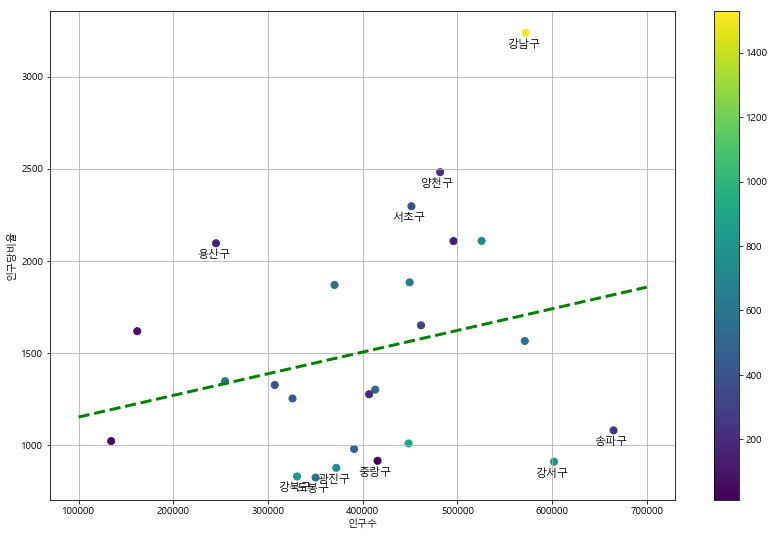

In [122]:
colormap = df_sort['오차']

plt.figure(figsize=(14,9))
plt.scatter(data_result['인구수'], data_result['소계'],
           s = 50, c=colormap)
plt.plot(fx, f1(fx), linestyle='dashed', color='green', lw=3)


for n in range(10) :
    plt.text(df_sort['인구수'][n] - 20000, df_sort['소계'][n] - 80,
            df_sort.index[n], fontsize=11)

plt.grid()
plt.colorbar()
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.show()

In [123]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,572140,567115,5025,61931,0.878282,10.824449,0.565945,1530.072021
강동구,1010,166.490765,448471,444168,4303,53195,0.959482,11.861414,0.225210,552.666561
강북구,831,125.203252,330704,327195,3509,54053,1.061070,16.344828,0.251282,593.337623
강서구,911,134.793814,602104,595485,6619,71062,1.099312,11.802280,0.151303,832.123647
관악구,2109,149.290780,525607,506851,18756,66952,3.568446,12.738034,0.401250,455.729612


In [124]:
data_result.to_csv("C:/Users/jeong/Documents/JUPYTER NOTEBOOK/CCTV_result.csv", sep=',', encoding='euc-kr')